In [4]:
import requests
from bs4 import BeautifulSoup
import re

headers = {
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'
}

member_list_300 = []
for index in range(1,31):
    url = f'https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex={index}'
    print(url)
    res = requests.get(url, headers=headers)
    #print(res.status_code)
    if res.ok:
        #print(res.json()['resultList'])
        member_list_10 = []
        for member in res.json()['resultList']:
            member_list_10.append(member) 
        
        #print(member_list_10)
        member_list_300.extend(member_list_10)
    else:
        print(res.status_code)
print(len(member_list_300))
print(member_list_300[:3])

https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=1
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=2
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=3
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=4
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=5
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=6
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=7
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=8
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=9
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=10
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=11
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=12
https://www.assembly.go.kr/portal/cnts/cntsNaas/f

In [4]:
from pprint import pprint

pprint(member_list_300[:3])

[{'cmitNm': '교육위원회',
  'electGbnNm': '비례대표',
  'hgNm': '강경숙',
  'mImgUrl': '/static/portal/img/openassm/new/68f83caf0c9e4546b1694ead863f45ce.jpg',
  'mLinkUrl': '/members/22nd/KANGKYUNGSOOK',
  'mThumbImgUrl': '/static/portal/img/openassm/new/thumb/68f83caf0c9e4546b1694ead863f45ce.jpg',
  'monaCd': 'T2T8225E',
  'openNaId': 'KANGKYUNGSOOK',
  'origNm': '비례대표',
  'polyNm': '조국혁신당',
  'reeleGbnNm': '초선',
  'rnum': 1,
  'sexGbnNm': '여',
  'st': '22',
  'unitNm': '제22대'},
 {'cmitNm': '국방위원회',
  'electGbnNm': '지역구',
  'hgNm': '강대식',
  'mImgUrl': '/static/portal/img/openassm/new/d1fe9f0902d84f0ba74f721d3298be7f.png',
  'mLinkUrl': '/members/22nd/KANGDAESIK',
  'mThumbImgUrl': '/static/portal/img/openassm/new/thumb/d1fe9f0902d84f0ba74f721d3298be7f.png',
  'monaCd': 'L2I9861C',
  'openNaId': 'KANGDAESIK',
  'origNm': '대구 동구군위군을',
  'polyNm': '국민의힘',
  'reeleGbnNm': '재선',
  'rnum': 2,
  'sexGbnNm': '남',
  'st': '22',
  'unitNm': '제22대'},
 {'cmitNm': '환경노동위원회, 기후위기 특별위원회',
  'electGbnNm': '지역구',

#### Json 데이터와 상세페이지 스크래핑 데이터 를 혼합해서 상세정보 저장하기

In [14]:
import requests
from bs4 import BeautifulSoup
import re
from urllib.parse import urljoin

print('===> 스크래핑 시작')
#297명의 정보를 저장하는 List
member_detail_list = []

headers = {
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'
}

for idx,member in enumerate(member_list_300,1):
    mem_sub_link = member['mLinkUrl']
    detail_url = f'https://www.assembly.go.kr{mem_sub_link}'
    res = requests.get(detail_url, headers=headers)
    print(res.ok, idx, detail_url)
    
    if res.ok:
        soup = BeautifulSoup(res.text, 'html.parser')
        
        #1명의 정보를 저장하는 dict 선언
        member_detail_dict = {}
        
        #li:nth-of-type(n+4) 4번째 li태그 가져오기
        li_tags = soup.select('ul.list li:nth-of-type(n+4)')
        #print(li_tags)
        # for li in li_tags:
        #     print(type(li.find('dt')))
        #     print(li.find('dt').text)
        
        dt_list = [li_tag.find('dt').text for li_tag in li_tags]
        #print(dt_list)

        dd_list = []        
        for li_tag in li_tags:
            dd_tag = li_tag.find('dd')
            pattern = re.compile(f'[\n\r\t]')
            dd_text = pattern.sub('',dd_tag.text.strip()).replace(" ","")
            dd_list.append(dd_text)
        #print(dd_list)
        
        member_detail_dict = dict(zip(dt_list, dd_list))
        
        # print(member_detail_dict)

        member_detail_dict['이름'] = member['hgNm']        
        member_detail_dict['정당'] = member['polyNm']
        member_detail_dict['성별'] = member['sexGbnNm']
        member_detail_dict['선거구'] = member['origNm']
        member_detail_dict['지역비례'] = member['electGbnNm']

        sosok = member['cmitNm']

        #소속위원회가 있으면, 실행
        if sosok is not None:
            idx = sosok.find(',')
            #소속위원회가 여러 개이면, 실행 
            if idx > -1:            
                member_detail_dict['소속위원회'] = sosok[:idx]

            #소속위원회가 한 개면, 실행
            else:
                member_detail_dict['소속위원회'] = sosok

        #소속위원회가 없으면, 실행
        else:        
            member_detail_dict['소속위원회'] = ''    

        # print(member_detail_dict['소속위원회'])                        
        
        member_detail_dict['당선횟수'] = member['reeleGbnNm']
        
        img_sub_url = member['mThumbImgUrl']
        img_url = urljoin(detail_url,img_sub_url)
        # print(img_url)
        member_detail_dict['이미지'] = img_url
        
        # pprint(member_detail_dict)       
                        
        #1명의 정보가 저장된 dict를 list에 추가하기
        member_detail_list.append(member_detail_dict)
    else:
        print(res.status_code)

print(len(member_detail_list))
print('===> 스크래핑 끝')

===> 스크래핑 시작
True 1 https://www.assembly.go.kr/members/22nd/KANGKYUNGSOOK
True 2 https://www.assembly.go.kr/members/22nd/KANGDAESIK
True 3 https://www.assembly.go.kr/members/22nd/KANGDEUKGU
True 4 https://www.assembly.go.kr/members/22nd/KANGMYOUNGGU
True 5 https://www.assembly.go.kr/members/22nd/KANGMINKUK
True 6 https://www.assembly.go.kr/members/22nd/KANGSUNYOUNG
True 7 https://www.assembly.go.kr/members/22nd/KANGSUNWOO
True 8 https://www.assembly.go.kr/members/22nd/KangSeungKyoo
True 9 https://www.assembly.go.kr/members/22nd/KANGJUNHYEON
True 10 https://www.assembly.go.kr/members/22nd/KOHDONGJIN
True 11 https://www.assembly.go.kr/members/22nd/KOMINJUNG
True 12 https://www.assembly.go.kr/members/22nd/KWAKKYUTAEK
True 13 https://www.assembly.go.kr/members/22nd/KWAKSANGEON
True 14 https://www.assembly.go.kr/members/22nd/KUJAKEUN
True 15 https://www.assembly.go.kr/members/22nd/KWEONSEONGDONG
True 16 https://www.assembly.go.kr/members/22nd/KWONYOUNGSE
True 17 https://www.assembly.go.kr/m

### 웹스크래핑한 데이터를 Pandas DataFrame객체로 저장하여 분석 및 시각화

In [15]:
import pandas as pd

member_df = pd.DataFrame(columns=['이름','정당','선거구','당선횟수','지역비례','성별','소속위원회','이미지','사무실 전화','사무실 호실',\
                                  '개별 홈페이지','이메일','보좌관','선임비서관','비서관','의원실 안내'])

for member_detail in member_detail_list:

    df_new_row = pd.DataFrame.from_records([member_detail])
    member_df = pd.concat([member_df, df_new_row])



print(member_df.columns)
print(member_df.shape)

member_df

Index(['이름', '정당', '선거구', '당선횟수', '지역비례', '성별', '소속위원회', '이미지', '사무실 전화',
       '사무실 호실', '개별 홈페이지', '이메일', '보좌관', '선임비서관', '비서관', '의원실 안내'],
      dtype='object')
(298, 16)


,이름,정당,선거구,당선횟수,지역비례,성별,소속위원회,이미지,사무실 전화,사무실 호실,개별 홈페이지,이메일,보좌관,선임비서관,비서관,의원실 안내
0,강경숙,조국혁신당,비례대표,초선,비례대표,여,교육위원회,https://www.assembly.go.kr/static/portal/img/o...,02-784-5601,의원회관515호,https://blog.naver.com/grace6752,gracesook52@rebuildingk.kr,"김재삼,서용선","김홍,오세령","권혁,박문혁,김예닮,이경열,김희경",
0,강대식,국민의힘,대구 동구군위군을,재선,지역구,남,국방위원회,https://www.assembly.go.kr/static/portal/img/o...,02-784-5275,의원회관341호,,kds21341@naver.com,"박홍규,유진영","김기일,이기백","박순권,김현정,황인택,박동혁,이정은",
0,강득구,더불어민주당,경기 안양시만안구,재선,지역구,남,환경노동위원회,https://www.assembly.go.kr/static/portal/img/o...,02-784-2747~9,의원회관814호,http://blog.naver.com/dulipapa,mainsail440@daum.net,"윤재우,정진태","최경순,홍미하","김창용,노주엽,남소영,홍영민,박시연",강득구의원의'사람중심민생중심'의정활동이국민의삶에힘이되도록최선을다하고있습니다.강득구의...
0,강명구,국민의힘,경북 구미시을,초선,지역구,남,농림축산식품해양수산위원회,https://www.assembly.go.kr/static/portal/img/o...,02-784-2844~6,의원회관1018호,https://blog.naver.com/0909kmg,myounggu.power@gmail.com,"김호직,윤상호","문형일,박윤경","박유진,전금오,임재연,강현지,박은영",
0,강민국,국민의힘,경남 진주시을,재선,지역구,남,정무위원회,https://www.assembly.go.kr/static/portal/img/o...,02-784-0797,의원회관1007호,,strongwind01@naver.com,"강민승,정경섭","김종민,문현곤","차지훈,김가은,김지호,신대중",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,홍기원,더불어민주당,경기 평택시갑,재선,지역구,남,외교통일위원회,https://www.assembly.go.kr/static/portal/img/o...,02-784-2577,의원회관525호,https://blog.naver.com/flyhong21,flyhong21@naver.com,"김정선,주남석","염민규,이상헌","안지영,김예준,한종수,문현정,정해인",[지역사무실]경기도평택시경기대로1371경성빌딩5층T:031-665-0415/F:03...
0,황명선,더불어민주당,충남 논산시계룡시금산군,초선,지역구,남,순직 해병 수사 방해 및 사건 은폐 등의 진실규명을 위한 국정조사특별위원회,https://www.assembly.go.kr/static/portal/img/o...,02-784-9820~22,의원회관611호,https://blog.naver.com/hms111best,hwangms0@naver.com,"김홍일,전문학","유경희,정주영","천지현,이희정,임형돈,김재민,김유희",총괄특보김민주정책특보김상일정무특보임경상비서관오정훈
0,황운하,조국혁신당,비례대표,재선,비례대표,남,국토교통위원회,https://www.assembly.go.kr/static/portal/img/o...,02-784-1935,의원회관552호,,unhah0301@gmail.com,"심대철,유승준","장진섭,정선호","한지현,윤여진,심준석,송준하,고진혁",
0,황정아,더불어민주당,대전 유성구을,초선,지역구,여,과학기술정보방송통신위원회,https://www.assembly.go.kr/static/portal/img/o...,02-784-2566,의원회관717호,https://blog.naver.com/k0heaven,hwang_0410@naver.com,"권영근,이태주","박찬중,조나연","이혜지,성기학,허윤정,박정수,강승민",


In [11]:
#index가 1부터 시작하도록 재설정

member_df.reset_index(drop=True, inplace=True)
member_df.index = member_df.index + 1 

print(member_df.index)

RangeIndex(start=1, stop=299, step=1)


In [ ]:
member_df.head(2)

In [14]:
member_df['정당'].unique()

array(['조국혁신당', '국민의힘', '더불어민주당', '무소속', '진보당', '기본소득당', '개혁신당', '사회민주당'],
      dtype=object)

In [15]:
member_df['정당'].value_counts()

정당
더불어민주당    167
국민의힘      107
조국혁신당      12
진보당         4
무소속         3
개혁신당        3
기본소득당       1
사회민주당       1
Name: count, dtype: int64

In [19]:
member_df['당선횟수'].unique()


array(['초선', '재선', '5선', '3선', '4선', '6선'], dtype=object)

In [20]:
member_df['당선횟수'].value_counts()

당선횟수
초선    131
재선     79
3선     46
4선     24
5선     14
6선      4
Name: count, dtype: int64

In [22]:
member_df.loc[member_df['당선횟수'] == '6선', ['이름']]

,이름
254,조경태
261,조정식
266,주호영
283,추미애


In [ ]:
#normailze=True : %(퍼센트)가 나오도록 표시
member_df['성별'].value_counts(normalize=True)


성별
남    0.791946
여    0.208054
Name: proportion, dtype: float64

In [33]:
member_df['선거구'].value_counts()

temp_str = member_df['선거구'].str

member_df['선거지역'] = temp_str[:2]

member_df.loc[0:3, ['선거구', '선거지역']]

member_df['선거지역'].value_counts()

선거지역
경기    60
서울    48
비례    46
부산    18
경남    16
경북    13
인천    13
대구    12
전북    10
충남    10
전남    10
충북     8
광주     8
강원     8
대전     7
울산     6
제주     3
세종     2
Name: count, dtype: int64

In [33]:
member_df['선거지역'].value_counts(normalize=True)

선거지역
경기    0.201342
서울    0.161074
비례    0.154362
부산    0.060403
경남    0.053691
경북    0.043624
인천    0.043624
대구    0.040268
전북    0.033557
충남    0.033557
전남    0.033557
충북    0.026846
광주    0.026846
강원    0.026846
대전    0.023490
울산    0.020134
제주    0.010067
세종    0.006711
Name: proportion, dtype: float64

In [9]:
member_df['이미지']


0    https://www.assembly.go.kr/static/portal/img/o...
0    https://www.assembly.go.kr/static/portal/img/o...
0    https://www.assembly.go.kr/static/portal/img/o...
Name: 이미지, dtype: object

### 시각화
* Image 출력 -Image 객체, display() 함수 사용
* seaborn - countplot, distplot, heatmap Plot 그려보기
* 한글폰트 설정

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import seaborn as sns

In [19]:
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'

font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)

matplotlib.rc('font', family=font_prop)



Malgun Gothic


### Seaborn의 막대 그래프
* barplot - x축과 y축을 둘 다 설정할 수 있음
* countplot - x축 이나 y축 중에서 하나만 설정할 수 있음
    * 범주형 속서을 가지는 데이터들의 히스토그래램을 보여준다.
    * 종류별로 count를 보여주는 Plot이다.

In [20]:
member_df['정당'].value_counts().index

Index(['더불어민주당', '국민의힘', '조국혁신당', '진보당', '무소속', '개혁신당', '기본소득당', '사회민주당'], dtype='object', name='정당')

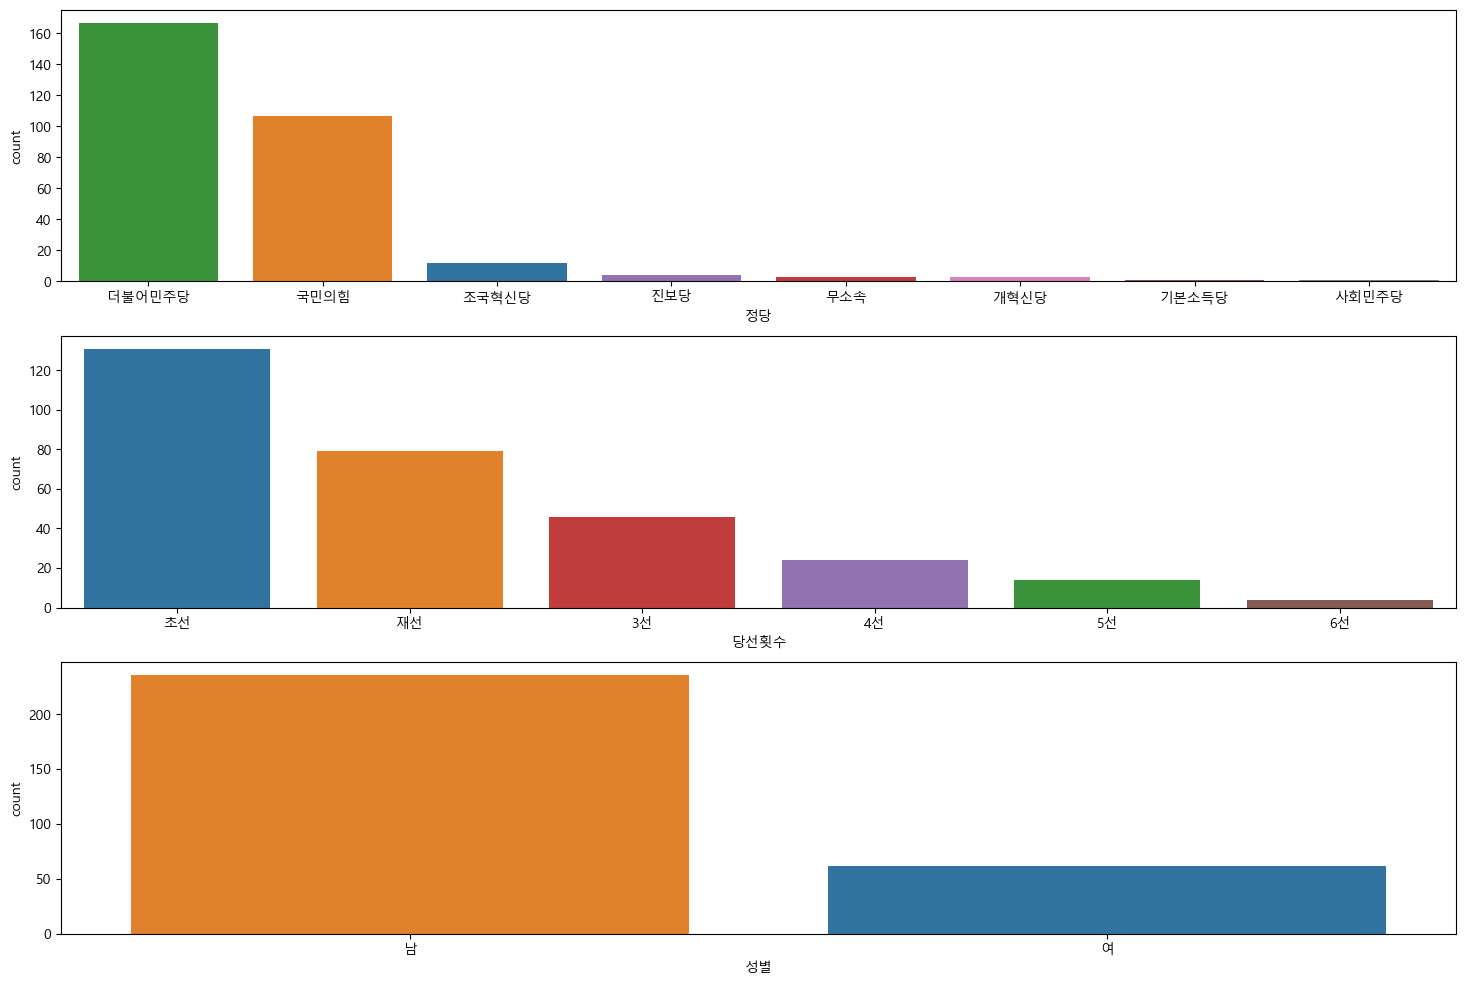

In [31]:
figure, (axes1, axes2, axes3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(18,12)

sns.countplot(data=member_df, x='정당', ax=axes1, order=member_df['정당'].value_counts().index, hue='정당')
sns.countplot(data=member_df, x='당선횟수', ax=axes2, order=member_df['당선횟수'].value_counts().index, hue='당선횟수')
sns.countplot(data=member_df, x='성별', ax=axes3, order=member_df['성별'].value_counts().index, hue='성별')
plt.show()

### Matplotlib의 Pie Plot 그려보기


In [34]:
cdf = member_df['선거지역'].value_counts(normalize=True)

print(cdf.index)

cdf

Index(['경기', '서울', '비례', '부산', '경남', '경북', '인천', '대구', '전북', '충남', '전남', '충북',
       '광주', '강원', '대전', '울산', '제주', '세종'],
      dtype='object', name='선거지역')


선거지역
경기    0.201342
서울    0.161074
비례    0.154362
부산    0.060403
경남    0.053691
경북    0.043624
인천    0.043624
대구    0.040268
전북    0.033557
충남    0.033557
전남    0.033557
충북    0.026846
광주    0.026846
강원    0.026846
대전    0.023490
울산    0.020134
제주    0.010067
세종    0.006711
Name: proportion, dtype: float64

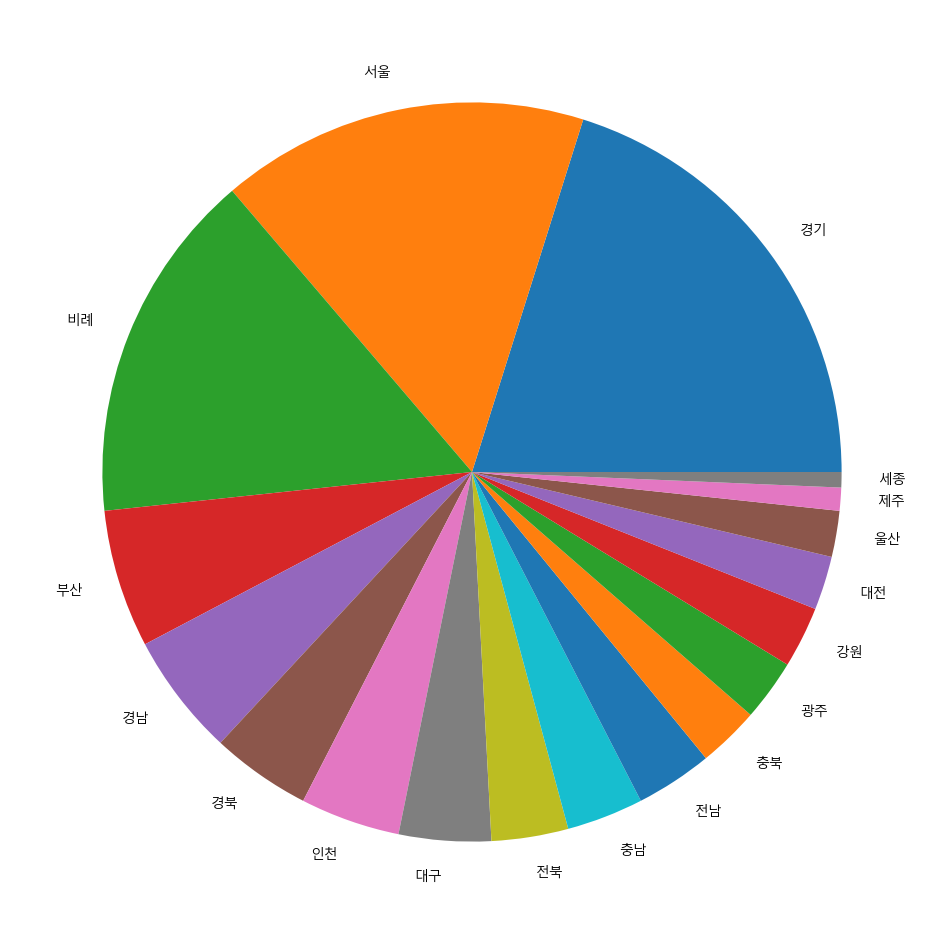

In [39]:
# figure size 설정
figure = plt.figure(figsize=(20,12))

#matplotlib
plt.pie(cdf, labels=cdf.index)
plt.show()